# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [2]:
#install spacy in the current conda environment
!pip install spacy


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Ryanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------- ------------------ 6.8/12.8 MB 35.0 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 32.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Ryanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [5]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [6]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [7]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [8]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [9]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [10]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [11]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [12]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [13]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

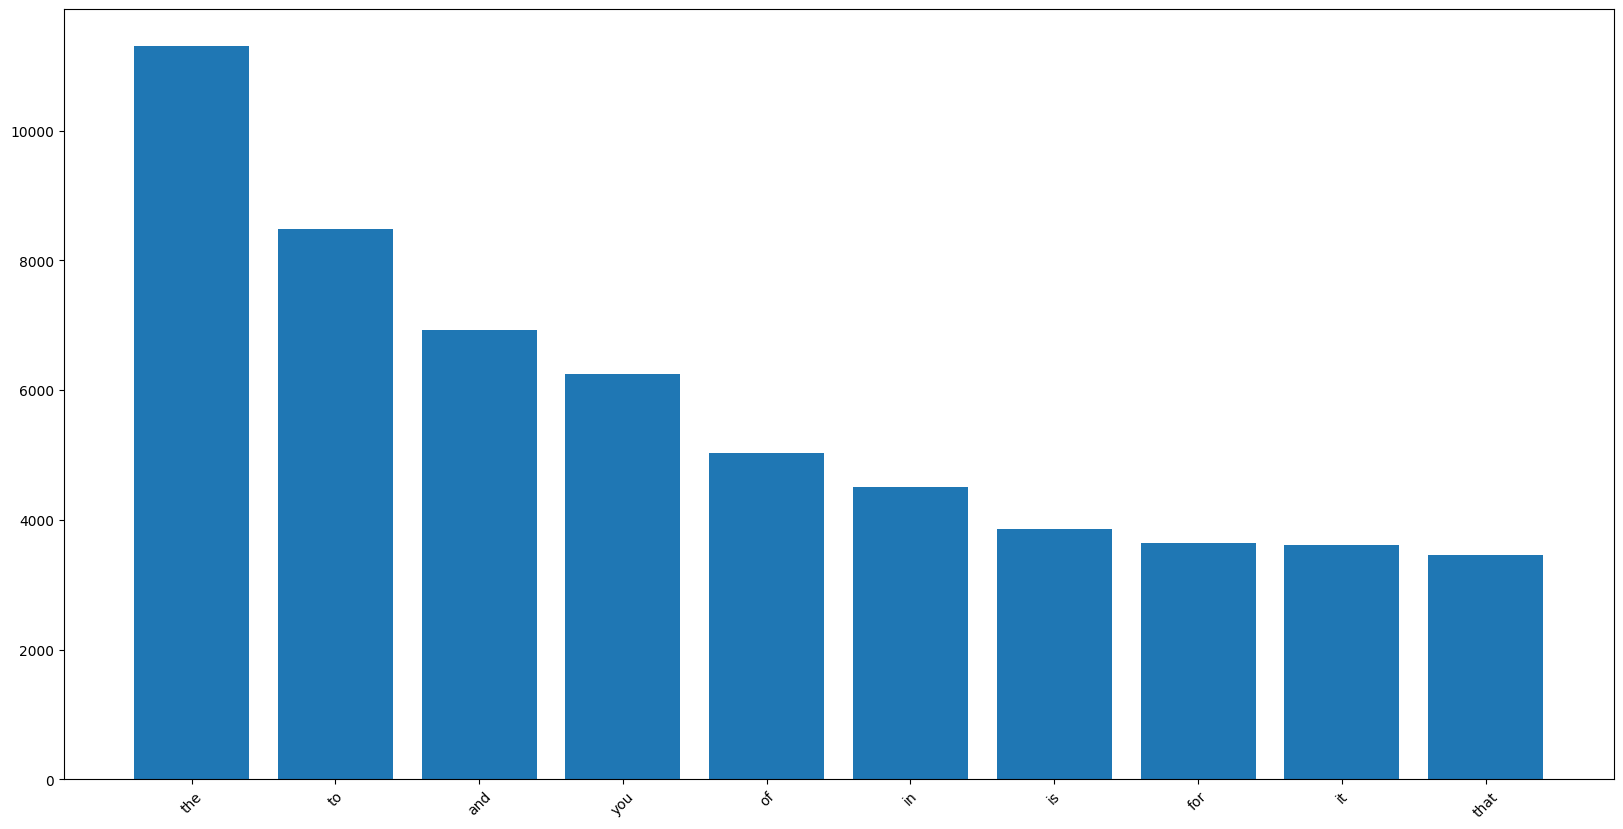

In [15]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: 

#### Lemmatization and stopword removal

In [16]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [17]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [18]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [19]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [20]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [21]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

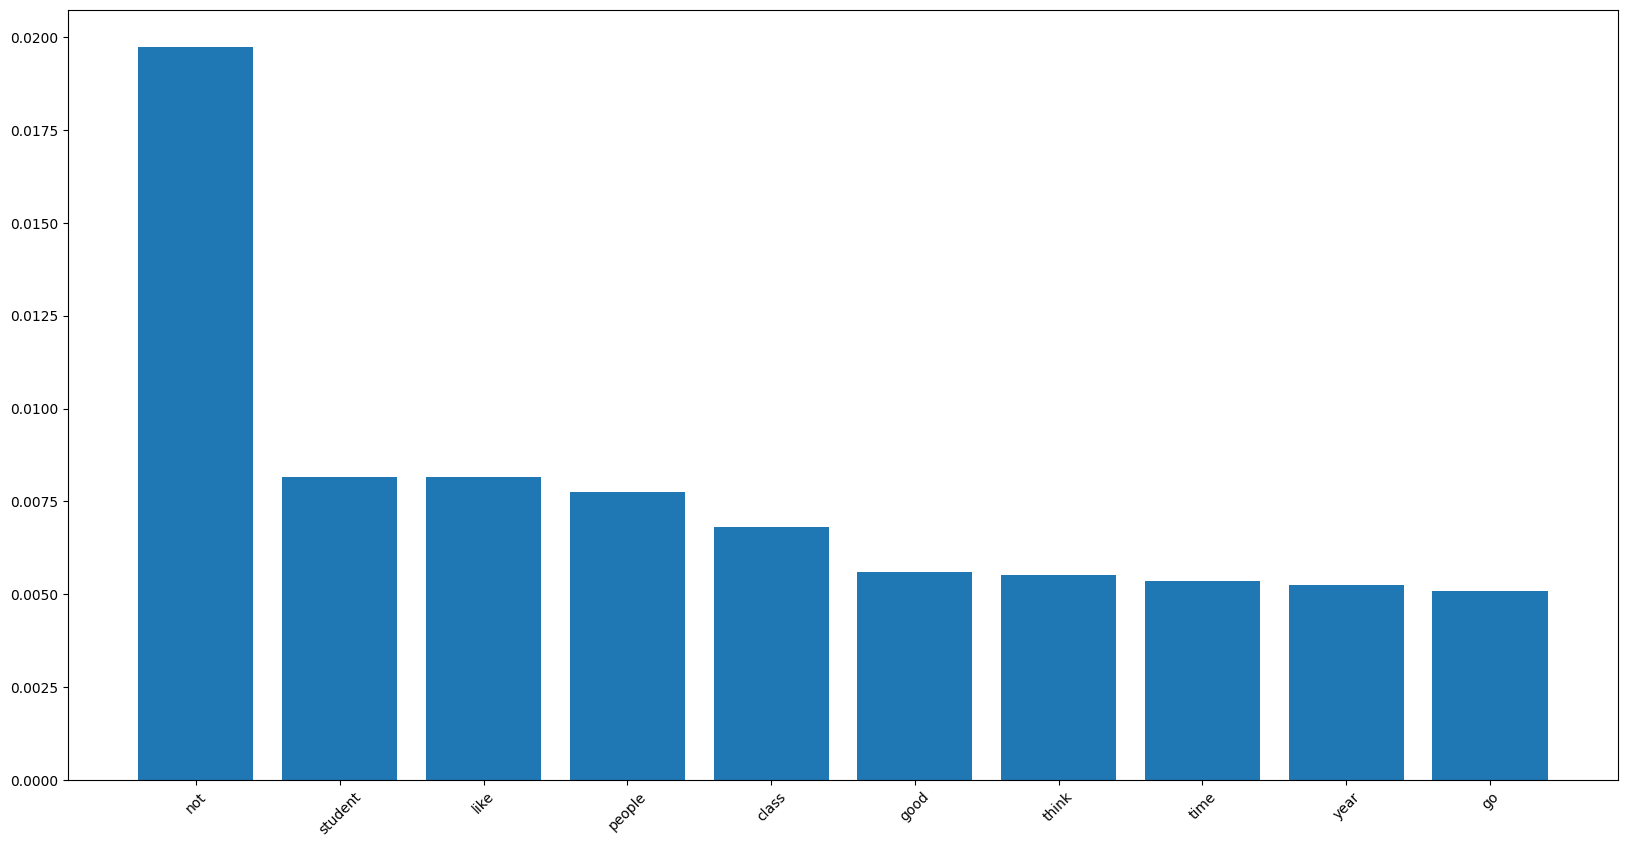

In [22]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [23]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.1400153180566765e-05

In [24]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

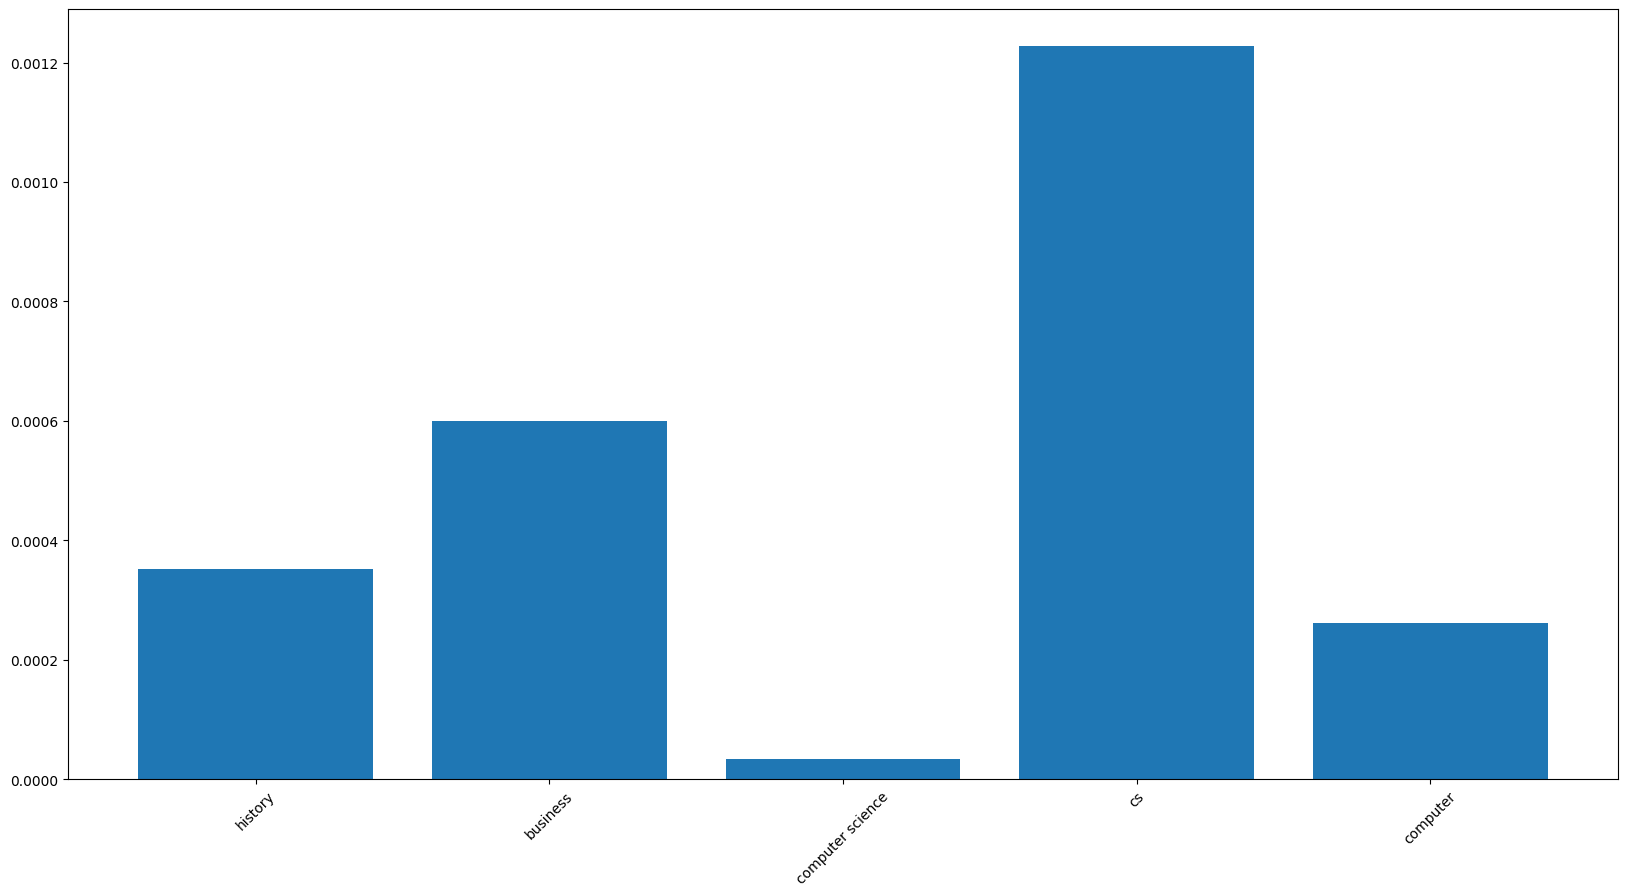

In [25]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [26]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

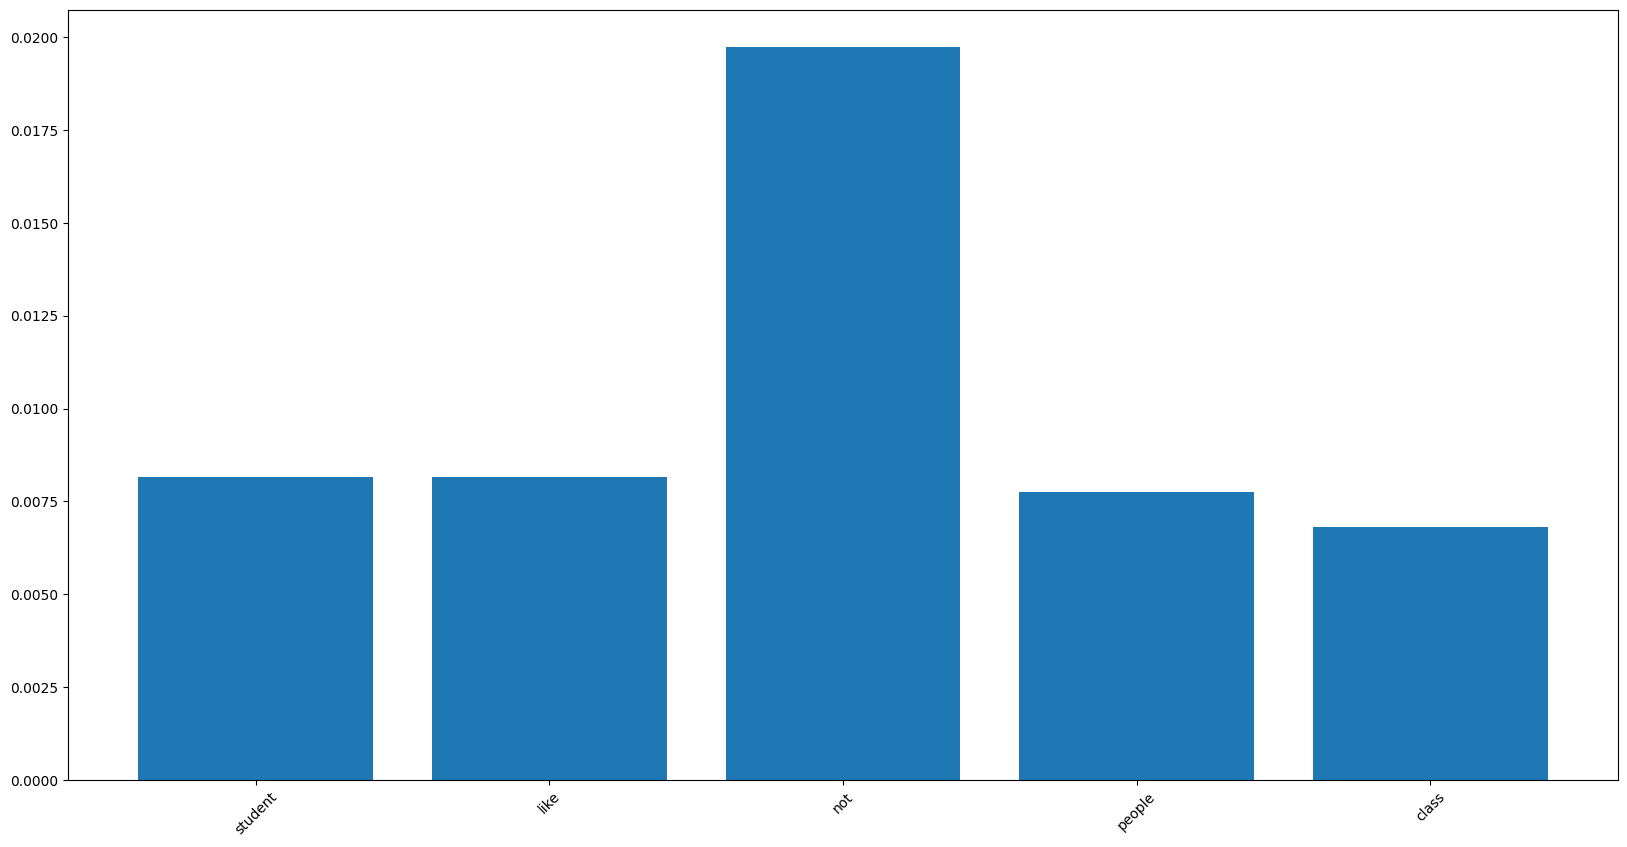

In [27]:
plot_list2=word_counts[["student", "like", "not", "people", "class"]]
plot_list2
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [28]:
uiuc=pd.read_csv("uiuc.csv")


In [29]:
uiuc['cleaned_text'] = uiuc['text'].apply(clean)

In [30]:
uiuc["cleaned_text"][0]
uiuc["text"][0]

'Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself\xa0\r\n\r\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture'

In [31]:
vectorizer = CountVectorizer()
bag_of_wordsUIUC = vectorizer.fit_transform(uiuc['cleaned_text'])

In [32]:
bow_dfUIUC = pd.DataFrame(bag_of_wordsUIUC.toarray(), columns=vectorizer.get_feature_names_out())
word_countsUIUC = bow_dfUIUC.sum()
word_countsUIUC = word_countsUIUC.sort_values(ascending=False)
word_countsUIUC


the                                                                                                       4613
to                                                                                                        3629
and                                                                                                       2973
you                                                                                                       2551
of                                                                                                        1854
                                                                                                          ... 
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                      1
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                        1
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcreditcards                       1
h

In [33]:
word_countsUIUC = word_countsUIUC / word_countsUIUC.sum()

word_countsUIUC

the                                                                                                       0.038535
to                                                                                                        0.030315
and                                                                                                       0.024835
you                                                                                                       0.021310
of                                                                                                        0.015488
                                                                                                            ...   
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                   0.000008
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                     0.000008
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcredi

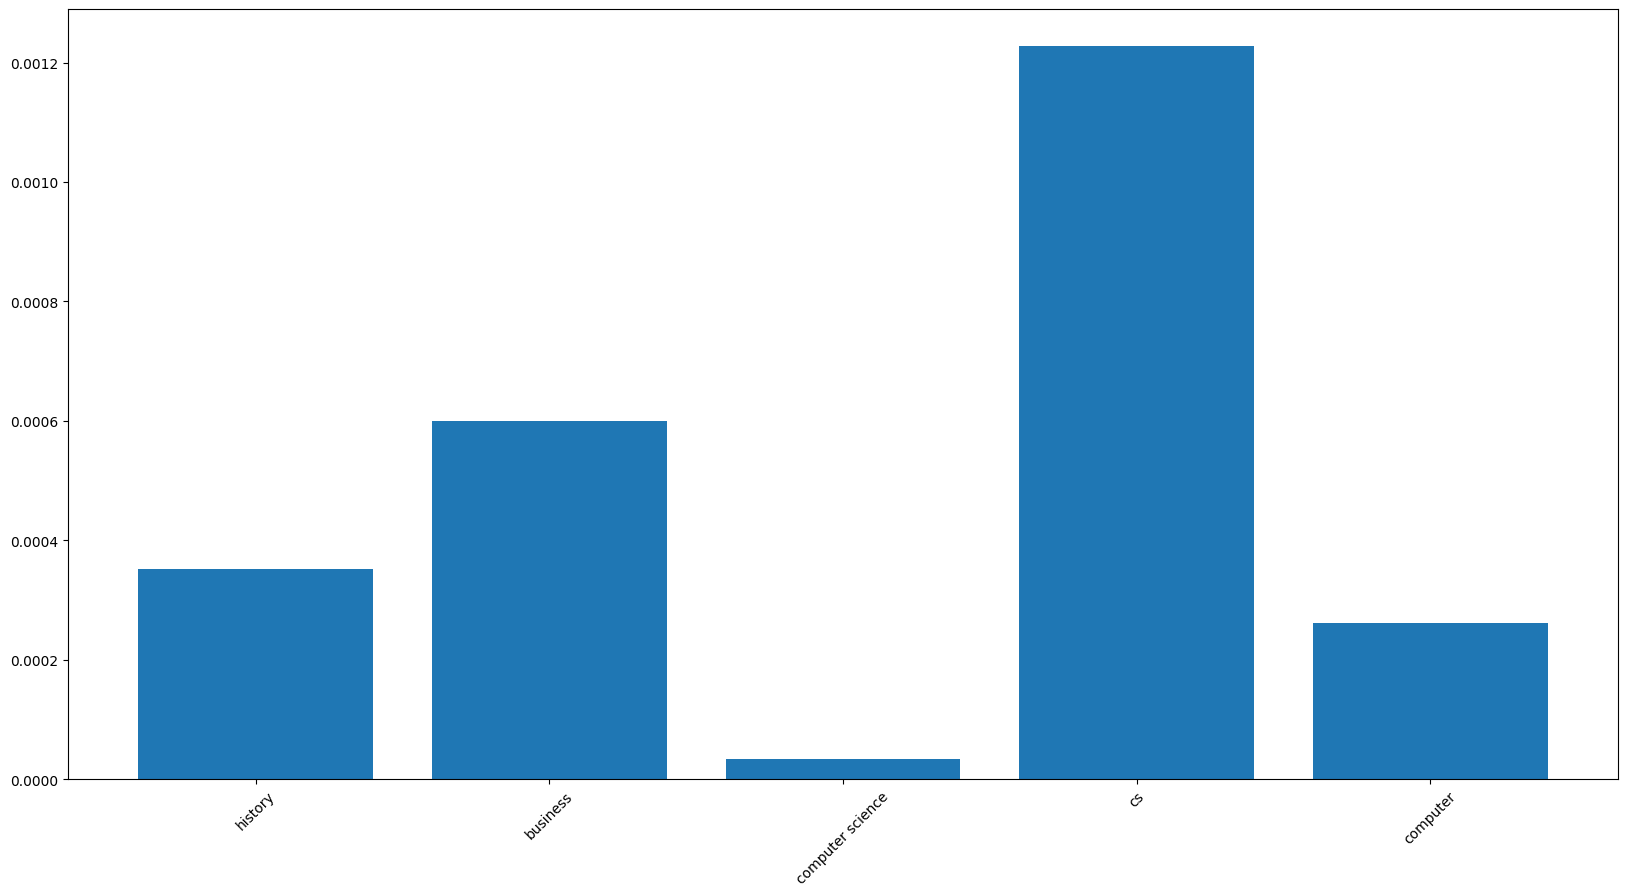

In [34]:
plot_listUIUC = word_countsUIUC.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [35]:
word_countsUIUC["history"]

0.00015036589033314398

In [36]:
plot_listUIUC=word_countsUIUC[["history", "business",'people', "cs", "computer"]]
plot_listUIUC

history     0.000150
business    0.000209
people      0.003985
cs          0.000652
computer    0.000109
dtype: float64

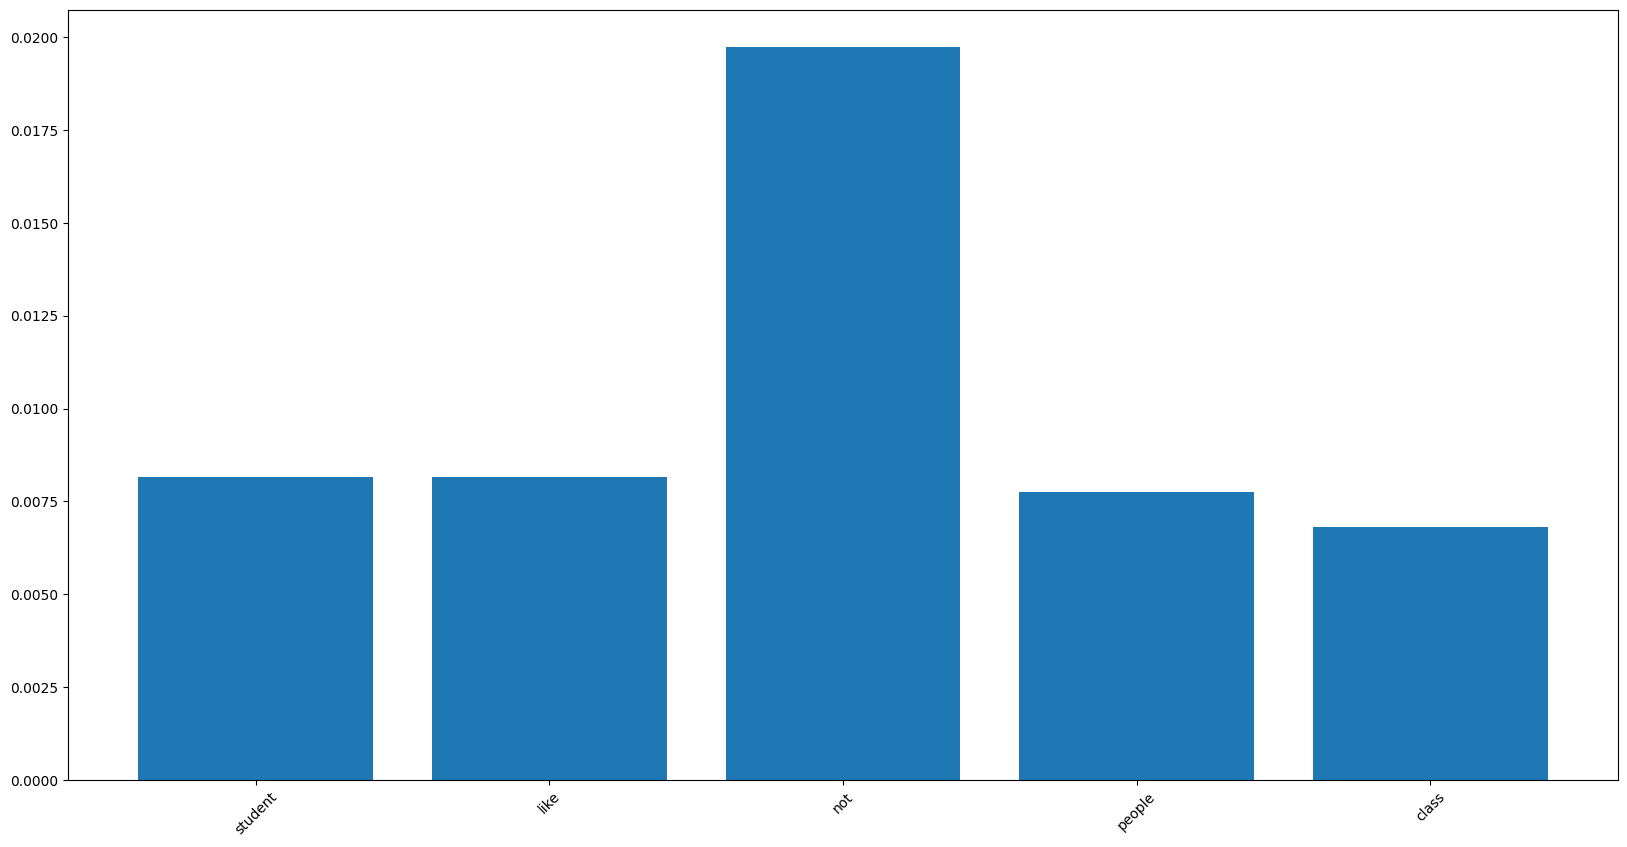

In [37]:
plot_listUIUC=word_countsUIUC[["student", "like", "not", "people", "class"]]
plot_listUIUC
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [38]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [39]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)
data["cleaned_text"][0]
data["text"][0]

'Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself\xa0\r\n\r\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture'

In [40]:
#create a bag of words representation with count vectorizer
vectorizerData = CountVectorizer()
bag_of_wordsData= vectorizer.fit_transform(data['cleaned_text'])

In [41]:
#train a logistic regression model using the bag of words features as X and the label column as y

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#create bow representation of the text
vectorizer = CountVectorizer(min_df=3, max_df=0.3,)
X = vectorizer.fit_transform(data["cleaned_text"])

#use sentiment as training labels
y = data["label"]

#split the data into training and testing
#testing is hidden from the model during training
#verify that your model can work on new data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the model
#higher max_iter is always better, but depends on your computer power
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model
#use trained value to see performance


#print accuracy (% of unseen reviews guessed correctly)



LogisticRegression(max_iter=1000)

In [42]:
#report the accuracy of the model
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.701058201058201

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [43]:
from sklearn.model_selection import train_test_split

# Assuming X is the bag-of-words feature matrix and y is the label column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (7560, 5924)
Testing set size: (1890, 5924)


In [44]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 

#The code appears to be worse,  this code be from data imbalances in what were trainging.

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"New Model Accuracy: {accuracy:.4f}")

New Model Accuracy: 0.7011


#### Part 3: Examine the top features of your model using the following code

In [53]:
import pandas as pd
feature_names = vectorizer.get_feature_names_out()
coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='coefficient', ascending=False)

top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

top_10_negative

,feature,coefficient
5241,texas,-1.795799
3155,mcard,-1.830258
4446,ross,-1.893126
1197,csg,-1.928391
395,august,-1.941679
216,ann,-1.969334
1604,eecs,-2.221291
2064,fresno,-2.420052
5492,umich,-2.431831
3227,michigan,-2.698890


In [54]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

In [55]:
top_10_positive

,feature,coefficient
5487,uiuc,2.912706
5568,urbana,2.075223
2543,illinois,2.068339
809,champaign,2.041622
2542,illini,1.995011
2227,grainger,1.975167
4457,rsos,1.789978
2859,las,1.730194
1201,cu,1.627272
4639,service,1.620428


From the topics identified, we see that the dataset reflects discussions on some of the most popular aspects of UIUC life, including academics, housing, social events, and sports. Grainger Library, a major study spot, aligns with academic discussions, while LAS, one of the largest colleges, is likely represented in coursework and student life topics. Urbana and Champaign frequently also.

Yes they do, the top words at UIUC are words that are sepcific to the Universty. Words like "ILLinois", "LAS" and "UIUC".

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [49]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Ryanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [50]:

#train a lda topic model with gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

#convert bow X into a gensim corpus
corpus = Sparse2Corpus(X, documents_columns=False)

# Step 3: Create a dictionary from the vectorizer's vocabulary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())


#train the lda model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=5)

#show the topics
lda_model.print_topics()


[(0,
  '0.024*"of" + 0.018*"in" + 0.018*"for" + 0.018*"it" + 0.015*"is" + 0.014*"that" + 0.013*"be" + 0.010*"with" + 0.010*"but" + 0.010*"on"'),
 (1,
  '0.025*"in" + 0.019*"of" + 0.018*"that" + 0.016*"is" + 0.013*"they" + 0.013*"was" + 0.012*"on" + 0.012*"for" + 0.012*"are" + 0.010*"if"'),
 (2,
  '0.022*"that" + 0.021*"is" + 0.019*"it" + 0.013*"have" + 0.013*"for" + 0.013*"of" + 0.012*"if" + 0.012*"but" + 0.011*"in" + 0.011*"its"'),
 (3,
  '0.027*"of" + 0.022*"in" + 0.014*"is" + 0.012*"it" + 0.012*"not" + 0.012*"if" + 0.012*"your" + 0.010*"but" + 0.010*"on" + 0.010*"people"'),
 (4,
  '0.021*"in" + 0.015*"for" + 0.015*"is" + 0.014*"they" + 0.014*"it" + 0.012*"me" + 0.011*"im" + 0.011*"not" + 0.010*"that" + 0.010*"of"')]

In [51]:
print(data.columns)

Index(['Unnamed: 0', 'date', 'post_votes', 'text', 'user', 'com_votes',
       'label', 'cleaned_text'],
      dtype='object')
